# CIND820 Analytics Project
# Controlling a Pandemic: Analyzing Key Factors in COVID-19 Outcomes by Country
Dataset: Our world in COVID-19

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling and evaluation
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
OWIDdf = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv')

In [4]:
OWIDdf.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
OWIDdf.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.232600e+04,72324.000000,71323.000000,6.317000e+04,63328.000000,71323.000000,71931.000000,71929.000000,70933.000000,62788.000000,...,66861.000000,45650.000000,67506.000000,68356.000000,53073.000000,52344.000000,33877.000000,61796.000000,69728.000000,67445.000000
mean,6.309405e+05,5133.419570,5148.895112,1.884372e+04,131.705423,115.824077,7457.152377,65.843446,65.798186,176.695576,...,19124.924520,13.272304,257.142324,7.795210,10.551031,32.648076,51.013951,3.036489,73.138549,0.727915
std,4.444134e+06,32209.604366,31944.665417,1.100672e+05,722.437700,659.922384,14727.855668,167.558912,140.727708,315.276769,...,19684.256471,19.919286,118.425077,3.936477,10.410374,13.465837,31.768424,2.467787,7.549671,0.150141
min,1.000000e+00,-74347.000000,-5648.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.210000e+02,2.000000,5.857000,3.700000e+01,0.000000,0.000000,142.924000,0.131000,0.987000,5.585500,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.602000
50%,7.818000e+03,58.000000,70.571000,2.450000e+02,2.000000,1.000000,1047.258000,6.271000,8.299000,30.635000,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,8.469400e+04,665.000000,691.571000,2.320000e+03,16.000000,12.143000,6861.506500,55.905000,62.900000,186.622000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.848000
max,1.168439e+08,879905.000000,738686.000000,2.593222e+06,17891.000000,14418.714000,142910.762000,8652.658000,2648.773000,2239.378000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [7]:
OWIDdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61866 entries, 0 to 61865
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               61514 non-null  object 
 1   continent                              61146 non-null  object 
 2   location                               61866 non-null  object 
 3   date                                   61866 non-null  object 
 4   total_cases                            61258 non-null  float64
 5   new_cases                              61251 non-null  float64
 6   new_cases_smoothed                     60293 non-null  float64
 7   total_deaths                           52732 non-null  float64
 8   new_deaths                             52731 non-null  float64
 9   new_deaths_smoothed                    60293 non-null  float64
 10  total_cases_per_million                60906 non-null  float64
 11  ne

# Data Preprocessing

In [10]:
OWIDdf.isnull().sum()

iso_code                                     0
continent                                 3634
location                                     0
date                                         0
total_cases                               1058
new_cases                                 1060
new_cases_smoothed                        2061
total_deaths                             10214
new_deaths                               10056
new_deaths_smoothed                       2061
total_cases_per_million                   1453
new_cases_per_million                     1455
new_cases_smoothed_per_million            2451
total_deaths_per_million                 10596
new_deaths_per_million                   10438
new_deaths_smoothed_per_million           2451
reproduction_rate                        14270
icu_patients                             65745
icu_patients_per_million                 65745
hosp_patients                            64199
hosp_patients_per_million                64199
weekly_icu_ad

In [11]:
###Removing columns where na is more than 50000
owiddfn = OWIDdf.loc[:, OWIDdf.isna().sum() < 50000]

In [12]:
###new_test features removed as they will correlate with total_test
owiddfn = owiddfn[owiddfn.columns.difference(owiddfn.filter(like='new').columns,sort=False)]

In [13]:
owiddfn = owiddfn.drop(columns=['total_cases','total_deaths','total_tests','aged_65_older','aged_70_older','iso_code','continent'])

In [78]:
owiddfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73384 entries, 0 to 73383
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    73384 non-null  object 
 1   date                        73384 non-null  object 
 2   total_cases_per_million     71931 non-null  float64
 3   total_deaths_per_million    62788 non-null  float64
 4   reproduction_rate           59114 non-null  float64
 5   total_tests_per_thousand    33328 non-null  float64
 6   positive_rate               37065 non-null  float64
 7   tests_per_case              36487 non-null  float64
 8   tests_units                 39580 non-null  object 
 9   stringency_index            62631 non-null  float64
 10  population                  72980 non-null  float64
 11  population_density          68559 non-null  float64
 12  median_age                  66660 non-null  float64
 13  gdp_per_capita              668

In the earlier stages of the pandemic, there was a lot of missing or underreported information

In [79]:
odf = owiddfn.copy()

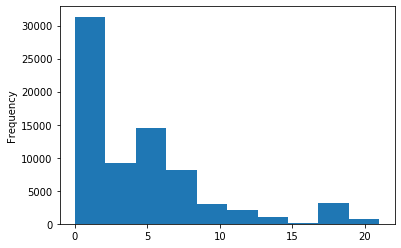

In [18]:
odf.isnull().sum(axis = 1).plot(kind='hist')

Remove rows where there are 5 + NA values

In [21]:
odf = odf[odf.isnull().sum(axis=1) < 5]

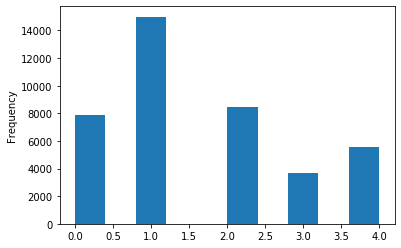

In [22]:
odf.isnull().sum(axis = 1).plot(kind='hist')

In [23]:
odf = odf[odf['total_cases_per_million'].notna()]
odf = odf[odf['total_deaths_per_million'].notna()]
odf = odf[odf['reproduction_rate'].notna()]


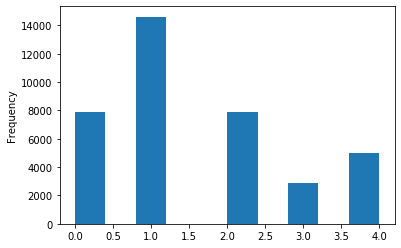

In [24]:
odf.isnull().sum(axis = 1).plot(kind='hist')

In [80]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73384 entries, 0 to 73383
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    73384 non-null  object 
 1   date                        73384 non-null  object 
 2   total_cases_per_million     71931 non-null  float64
 3   total_deaths_per_million    62788 non-null  float64
 4   reproduction_rate           59114 non-null  float64
 5   total_tests_per_thousand    33328 non-null  float64
 6   positive_rate               37065 non-null  float64
 7   tests_per_case              36487 non-null  float64
 8   tests_units                 39580 non-null  object 
 9   stringency_index            62631 non-null  float64
 10  population                  72980 non-null  float64
 11  population_density          68559 non-null  float64
 12  median_age                  66660 non-null  float64
 13  gdp_per_capita              668

In [102]:
np.unique(odf.location)
country_subset = ['Canada','United States','Vietnam','United Kingdom','Uganda','Thailand','Indonesia','Italy',
                  'Jamaica','Japan','Philippines','Poland','Ghana','Greece','Colombia','China',
                 'Brazil','South Korea','New Zealand','Russia','Libya','Botswana']

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
  

# Imbalanced Data 

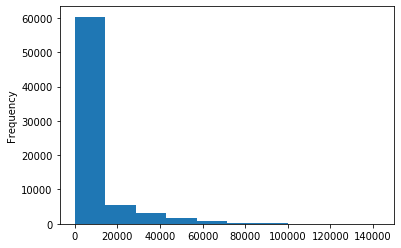

In [135]:
#Total_cases_per_million
#Imbalanced data?
odf.total_cases_per_million.plot(kind='hist')

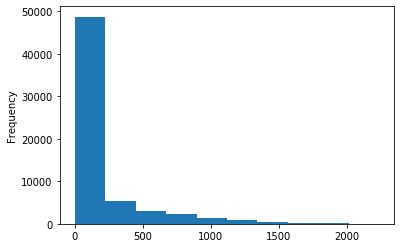

In [136]:
#total_deaths_per_million
#Imbalanced
odf.total_deaths_per_million.plot(kind='hist')

6.74


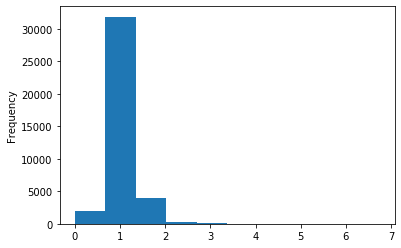

In [66]:
#Looking at the distribution of reproduction_rate
odf.reproduction_rate.plot(kind ='hist')

# SMOGN : Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise


In [137]:
#!pip install smogn https://pypi.org/project/smogn/#files

# Exploratory Data Analysis 

In [26]:
odf.corr()

,total_cases_per_million,total_deaths_per_million,reproduction_rate,total_tests_per_thousand,positive_rate,tests_per_case,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases_per_million,1.000000,0.794825,-0.101335,0.623425,0.158689,-0.086187,0.099879,-0.069360,0.031807,0.290051,0.331688,-0.280246,-0.159827,0.153326,0.269350,0.044937,0.344480,0.133104,0.317444,0.343915
total_deaths_per_million,0.794825,1.000000,-0.076497,0.329876,0.228323,-0.094805,0.123192,-0.036077,-0.075208,0.324160,0.167548,-0.293471,-0.192784,-0.003515,0.362206,-0.012498,0.291408,0.130680,0.313143,0.330230
reproduction_rate,-0.101335,-0.076497,1.000000,-0.072971,0.083477,-0.120327,0.076986,0.039879,-0.023945,0.112796,0.051210,-0.162871,-0.007587,0.051590,0.084565,0.056677,0.082909,0.086086,0.092543,0.115055
total_tests_per_thousand,0.623425,0.329876,-0.072971,1.000000,-0.163887,0.033120,-0.077109,-0.080341,0.150147,0.244812,0.441332,-0.211995,-0.140232,0.127244,0.194745,0.024765,0.331128,0.067400,0.298394,0.350057
positive_rate,0.158689,0.228323,0.083477,-0.163887,1.000000,-0.161491,0.250842,-0.003923,-0.105812,-0.171525,-0.226244,-0.003307,0.073802,0.067325,-0.091870,-0.057389,0.122732,-0.152493,-0.122177,-0.146110
tests_per_case,-0.086187,-0.094805,-0.120327,0.033120,-0.161491,1.000000,-0.089627,-0.032690,0.142384,0.068932,0.095143,-0.061070,-0.100073,0.004848,-0.007663,-0.057381,0.072467,-0.009809,0.111401,0.100968
stringency_index,0.099879,0.123192,0.076986,-0.077109,0.250842,-0.089627,1.000000,0.103059,-0.013693,0.010507,0.010800,-0.260107,-0.105074,0.212762,-0.050952,0.039911,0.328996,-0.168836,0.129374,0.102964
population,-0.069360,-0.036077,0.039879,-0.080341,-0.003923,-0.032690,0.103059,1.000000,0.008923,-0.092640,-0.109647,0.042404,0.067096,0.101404,-0.145468,-0.032658,0.018974,-0.122825,-0.128548,-0.118254
population_density,0.031807,-0.075208,-0.023945,0.150147,-0.105812,0.142384,-0.013693,0.008923,1.000000,0.103564,0.282438,-0.018574,-0.164650,0.180467,-0.094590,0.019728,0.056276,-0.027360,0.155050,0.120175
median_age,0.290051,0.324160,0.112796,0.244812,-0.171525,0.068932,0.010507,-0.092640,0.103564,1.000000,0.585727,-0.699459,-0.237923,0.175786,0.738205,0.324175,0.779848,0.699065,0.843588,0.884053


Text(0.5, 1, 'OWID COVID Correlation Heatmap')

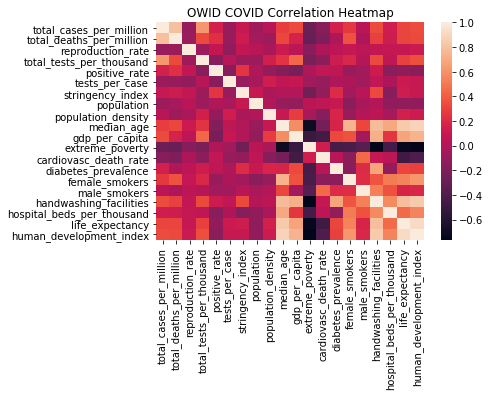

In [27]:
hmp = sns.heatmap(odf.corr())
hmp.set_title('OWID COVID Correlation Heatmap')

Text(0.5, 1, 'Features correlating with total_cases')

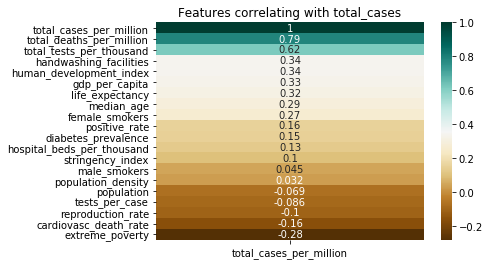

In [28]:
dhmp = sns.heatmap(odf.corr()[['total_cases_per_million']].sort_values(by='total_cases_per_million', ascending=False), annot=True, cmap='BrBG')
dhmp.set_title('Features correlating with total_cases')

Text(0.5, 1, 'Features correlating with total_deaths')

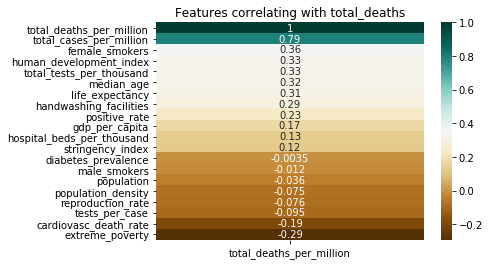

In [29]:
dhmp = sns.heatmap(odf.corr()[['total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False), annot=True, cmap='BrBG')
dhmp.set_title('Features correlating with total_deaths')

In [54]:
nowiddfn = odf.select_dtypes(include='float64')
#ppdf = sns.pairplot(nowiddfn.sample(1000))
#ppdf.savefig("pairplotowid.png")

Some of the target variables to consider: reproduction_rate, total_cases_per_million, total_deaths_per_million.
Normally we would also consider crude mortality rate or case-fatality rate as well. However, confirmed cases is often underreported AND undertested and as such may be harder to evaluate accurately. It is important to consider that the data being robust and accurate relies heavily on the nation's testing capacity. 

Remember that the reproduction rate (R) describes the trajectory of the virus. A value of R = 1 means the amount of new infections and new recoveries are equal; meaning the virus numbers will stagnate. A value of 6.74 means the number of infected is sharply increasing and may lead in a big spike of infections and deaths, depending on government mitigation strategy.

In [81]:
print(OWIDdf.reproduction_rate.max())
odf[odf.reproduction_rate==6.74]

,location,date,total_cases_per_million,total_deaths_per_million,reproduction_rate,total_tests_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
61262,South Korea,2020-02-22,8.446,0.039,6.74,0.383,0.033,29.9,people tested,45.37,...,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916


# Calculating Crude Mortality/Case-Fatality

In [85]:
#Most recent numbers
odfdt = odf.copy()
odfdt['date'] = pd.to_datetime(odfdt['date'])
most_recent_date = odfdt.date.max();

odfdt = odfdt[odfdt.date == most_recent_date]

In [91]:
OWIDdf.date = pd.to_datetime(OWIDdf.date)

In [131]:
#Calculating Crude Mortality (COVID deaths/population) and CaseFatality (COVID deaths/COVID cases)
SK_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].population)
SK_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_cases)

SK_Median_age = OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" South Korea Crude Mortality:",SK_Covid_Crude_Mortality.iloc[0],"%\n","South Korea Case-Fatality: ",SK_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", Median_age)

 South Korea Crude Mortality: 3.202703659233267e-05 %
 South Korea Case-Fatality:  0.01769072475947294 %
 Median Age: 43.4


South Korea reported one of the largest spikes in the early stages of the pandemic, yet they are one of the countries with the lowest COVID-19 Mortality, which may be attributed to hospital bed capacity.

In [133]:
ITA_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].population)
ITA_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_cases)

ITA_Median_age = OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" Italy Crude Mortality:",ITA_Covid_Crude_Mortality.iloc[0],"%\n","Italy Case-Fatality: ",ITA_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", ITA_Median_age )

 Italy Crude Mortality: 0.0016503801373653473 %
 Italy Case-Fatality:  0.03252989581696542 %
 Median Age: 47.9


Italy may have suffered more loss due to their higher median age.


In [134]:
US_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].population)
US_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_cases)

US_Median_age = OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" United States Crude Mortality:",US_Covid_Crude_Mortality.iloc[0],"%\n","United States Case-Fatality: ",US_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", US_Median_age )

 United States Crude Mortality: 0.0015861836899449327 %
 United States Case-Fatality:  0.01810869472992218 %
 Median Age: 38.3


# Modelling to derive a Feature Profile

### One Hot Encoding for the Random Forest (***may not be used)

In [120]:

y=odf2.total_deaths_per_million
X=odf2[odf2.columns.difference(['total_deaths_per_million','total_cases_per_million','date','tests_units','continent'])]

odf2_onehot = odf2.copy()
odf2_onehot = pd.get_dummies(odf2, columns = str_cols, prefix = str_cols)
odf2_onehot

In [58]:
str_cols = X.select_dtypes(include="object").columns.to_list()
str_cols

odf_onehot = odf.copy()
odf_onehot = pd.get_dummies(odf, columns=str_cols, prefix = str_cols)
odf_onehot

y=odf_onehot.total_deaths_per_million
X=odf_onehot[odf_onehot.columns.difference(['total_deaths_per_million','total_cases_per_million','date','tests_units','continent'])]
#X_o = X.fillna(X.median())

# Random Forest Regressor

In [31]:
y=odf.total_deaths_per_million

#y=odf.total_cases_per_million

X=odf[odf.columns.difference(['total_deaths_per_million','total_cases_per_million','date',
                              'tests_units','continent','location','reproduction_rate'])] 
X


,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty,female_smokers,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand,human_development_index,life_expectancy,male_smokers,median_age,population,population_density,positive_rate,stringency_index,tests_per_case,total_tests_per_thousand
795,304.195,10.08,1.1,7.1,11803.431,NaN,2.89,0.795,78.57,51.2,38.0,2877800.0,104.871,0.243,84.26,4.1,NaN
796,304.195,10.08,1.1,7.1,11803.431,NaN,2.89,0.795,78.57,51.2,38.0,2877800.0,104.871,0.336,84.26,3.0,0.320
797,304.195,10.08,1.1,7.1,11803.431,NaN,2.89,0.795,78.57,51.2,38.0,2877800.0,104.871,0.334,84.26,3.0,0.356
798,304.195,10.08,1.1,7.1,11803.431,NaN,2.89,0.795,78.57,51.2,38.0,2877800.0,104.871,0.296,84.26,3.4,0.392
799,304.195,10.08,1.1,7.1,11803.431,NaN,2.89,0.795,78.57,51.2,38.0,2877800.0,104.871,0.283,84.26,3.5,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73378,307.846,1.82,21.4,1.6,1899.775,36.791,1.70,0.571,61.49,30.7,19.6,14862927.0,42.729,0.018,NaN,56.2,25.931
73379,307.846,1.82,21.4,1.6,1899.775,36.791,1.70,0.571,61.49,30.7,19.6,14862927.0,42.729,0.016,NaN,61.5,26.059
73380,307.846,1.82,21.4,1.6,1899.775,36.791,1.70,0.571,61.49,30.7,19.6,14862927.0,42.729,0.018,NaN,54.9,26.197
73381,307.846,1.82,21.4,1.6,1899.775,36.791,1.70,0.571,61.49,30.7,19.6,14862927.0,42.729,0.017,NaN,58.6,26.300


In [38]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(train_X)
train_X = imp.transform(train_X)

valimp = SimpleImputer(missing_values=np.nan, strategy='median')
valimp = valimp.fit(val_X)
val_X = valimp.transform(val_X)
##train_y2 = train_y.fillna(train_y.median())

In [39]:
clf = RandomForestRegressor(n_estimators=100, oob_score = True, bootstrap = True, random_state = 1)
clf = clf.fit(train_X, train_y)

In [40]:
print('R^2 training set: {:.2f} \nout of bag score: {:.2f} \nR^2 val set: {:.2f}'.format(clf.score(train_X, train_y), 
                                                                                             clf.oob_score_,
                                                                                             clf.score(val_X, val_y)))


R^2 training set: 0.99 
out of bag score: 0.98 
R^2 val set: 0.98


In [57]:
val_pred = clf.predict(val_X)
val_mae = mean_absolute_error(val_pred, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 10


Extremely high R^2 score and very low MAE suggests severe overfitting of the model 

Feature ranking:
1 	 total_tests_per_thousand 0.26426106319804404
2 	 positive_rate 0.12864736442780442
3 	 female_smokers 0.12315416879275563
4 	 stringency_index 0.09327616574845189
5 	 cardiovasc_death_rate 0.06321031698495269
6 	 population_density 0.047972790681999736
7 	 human_development_index 0.04086144940344576
8 	 tests_per_case 0.03953161457655835
9 	 population 0.0346324820936728
10 	 diabetes_prevalence 0.03325434931067732
11 	 male_smokers 0.026055088199571776
12 	 extreme_poverty 0.025411091070414903
13 	 median_age 0.020800277504116105
14 	 gdp_per_capita 0.019868020744837747
15 	 hospital_beds_per_thousand 0.017685880227459788
16 	 life_expectancy 0.015863042383654106
17 	 handwashing_facilities 0.005514834651583002


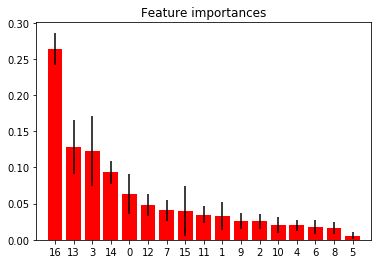

In [56]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range (train_X.shape[1]):
    featurelist = []
    featurelist.append(X.columns[indices[f]])
    print(f + 1,"\t", X.columns[indices[f]], importances[indices[f]])
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

The model itself is too biased for these feature importances to hold significance.

# Multiple Regression 

In [67]:
model = sm.OLS(train_y, train_X).fit()

In [68]:
predictions = model.predict(train_X)

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     total_deaths_per_million   R-squared (uncentered):                   0.502
Model:                                  OLS   Adj. R-squared (uncentered):              0.501
Method:                       Least Squares   F-statistic:                              1694.
Date:                      Mon, 08 Mar 2021   Prob (F-statistic):                        0.00
Time:                              22:19:02   Log-Likelihood:                     -2.0113e+05
No. Observations:                     28642   AIC:                                  4.023e+05
Df Residuals:                         28625   BIC:                                  4.024e+05
Df Model:                                17                                                  
Covariance Type:                  nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2815      0.019    -14.998      0.000      -0.318      -0.245
x2            -5.9609      0.620     -9.613      0.000      -7.176      -4.745
x3            -1.1271      0.168     -6.729      0.000      -1.455      -0.799
x4             5.8149      0.267     21.775      0.000       5.291       6.338
x5            -0.0026      0.000    -18.965      0.000      -0.003      -0.002
x6             0.0513      0.117      0.439      0.661      -0.178       0.280
x7           -12.7636      1.024    -12.467      0.000     -14.770     -10.757
x8           302.5648     42.840      7.063      0.000     218.596     386.534
x9            -3.4154      0.422     -8.100      0.000      -4.242      -2.589
x10           -2.1206      0.170    -12.508      0.000      -2.453      -1.788
x11            8.6764      0.524     16.558      0.000       7.649       9.704
x12         3.419e-08   1.17e-08      2.912      0.004    1.12e-08    5.72e-08
x13           -0.0151      0.002     -6.541      0.000      -0.020      -0.011
x14          907.7020     18.085     50.191      0.000     872.255     943.149
x15            0.6867      0.096      7.147      0.000       0.498       0.875
x16           -0.0297      0.002    -13.881      0.000      -0.034      -0.026
x17            0.2984      0.006     53.010      0.000       0.287       0.309
==============================================================================
Omnibus:                    10250.210   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41180.748
Skew:                           1.756   Prob(JB):                         0.00
Kurtosis:                       7.709   Cond. No.                     4.00e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
print(X.columns[8], X.columns[12], X.columns[14])

life_expectancy population_density stringency_index


Pop. Density, Life_expectancy and Stringency_index look like the strongest candidates for feature importance from the linear regression, however these results should be interpreted with caution.